# Visualisation of Data with Pie Charts in Matplotlib. #

Examples of how to create different types of pie charts using Matplotlib to visualize the results of database analysis in a Jupyter Notebook with Pandas.



## The Challenge ##

While working on my Master’s Thesis titled "Factors Associated with Impactful Scientific Publications in NIH-Funded Heart Disease Research", I have used different types of pie charts to illustrate some of the key findings from the database analysis. 

A pie chart can be an effective choice for data visualization when a dataset contains a limited number of categories representing parts of a whole, making it well-suited for displaying categorical data with an emphasis on comparing the relative proportions of each category.

In this article, I will demonstrate how to create four different types of pie charts using the same dataset to provide a more comprehensive visual representation and deeper insight into the data. To achieve this, I will use Matplotlib, Python's plotting library, to display pie chart visualizations of the statistical data stored in the dataframe.
If you are not familiar with Matplotlib library, a good start is Python Data Science Handbook by Jake VanderPlas, specifically chapter on [Visualization with Matplotlib](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html) and [matplotlib.org](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html).

#### First, let's import all the necessary libraries and extensions:  ####

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Next, we'll prepare the CSV file for processing: ####

The mini dataset used in this article highlights the top 10 journals for heart disease research publications from 2002 to 2020 and is part of a larger database collected for the Master's Thesis research. The columns "Female," "Male," and "Unknown" represent the gender of the first author of the published articles, while the "Total" column reflects the total number of heart disease research articles published in each journal.

In [27]:
# saving common path to use to read in dataset
path = 'C:/Users/droze/OneDrive/Documents/Medium/'

Heart_disease_journals = pd.read_csv(path + 'Heart_disease_journals.csv')
Heart_disease_journals

,Journal,Female,Male,Unknown,Total
0,AJ of Physiology Heart and Circulatory Physiology,1162,2531,322,4015
1,Circulation,735,1795,125,2655
2,Plos One,747,1100,111,1958
3,Circulation Research,570,1254,109,1933
4,Journal of Biological Chemistry,580,1020,112,1712
5,"Arteriosclerosis, Thrombosis, and Vascular Bio...",503,833,115,1451
6,Hypertension,438,809,50,1297
7,Journal of the American Heart Association,476,668,41,1185
8,Journal of Molecular and Cellular Cardiology,345,672,95,1112
9,Journal of the American College of Cardiology,289,776,27,1092


For smaller datasets with fewer categories, a pie chart with exploding slices can effectively highlight a key category by pulling it out slightly from the rest of the chart. This visual effect draws attention to specific categories, making them stand out from the whole. Each slice represents a portion of the total, with its size proportional to the data it represents. Labels can be added to each slice to indicate the category, along with percentages to show their proportion to the total. This visual technique makes the exploded slice stand out without losing the context of the full data representation. 


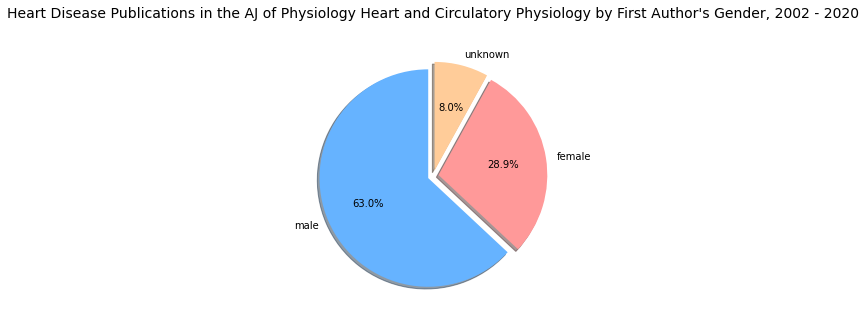

In [30]:
plt.figure(figsize=(12,5))
slices = [2531,1162, 322]
gender = ['male','female', 'unknown']
cols = ['#66b3ff','#ff9999', '#ffcc99']
plt.pie(slices, labels=gender, colors=cols, startangle=90, shadow= True, explode=(0.05,0.05, 0.05), autopct='%1.1f%%')
plt.title("Heart Disease Publications in the AJ of Physiology Heart and Circulatory Physiology by First Author's Gender, 2002 - 2020\n", fontsize=14)
plt.show()

The same exploding slices technique can be applied to all other entries in the sample dataset, and the resulting charts can be displayed within a single figure. This type of visualization helps to highlight the overrepresentation or underrepresentation of a particular category within the dataset. In the example provided, presenting all 10 charts in one figure reveals that none of the top 10 journals in heart disease research published more articles authored by women than men, thereby emphasizing the gender disparity.

<Figure size 432x288 with 0 Axes>

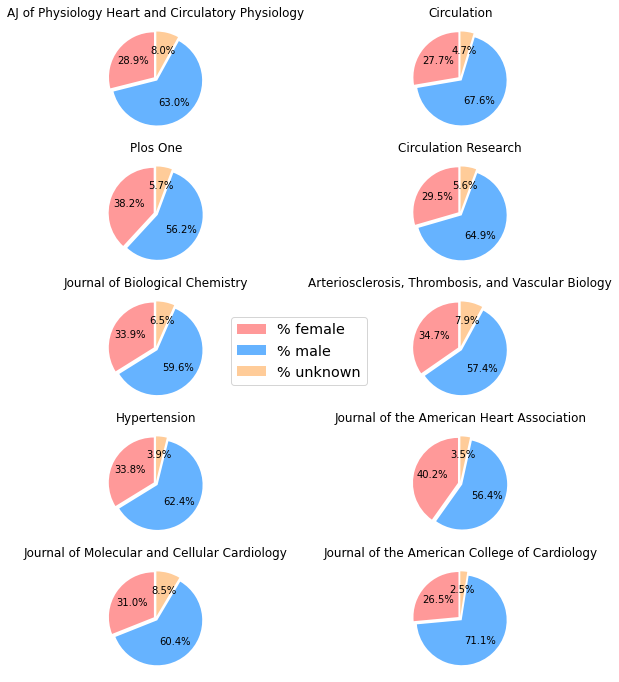

In [34]:
plt.figure()

def slices(df, slices_number):
    slices_list =[]
    for i in range(slices_number):
        slice = [df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3]]        
        slices_list.append(slice)
        i = i+1
    return slices_list

slices_number = 10
slices_list = slices(Heart_disease_journals, slices_number)

cols = ['#ff9999', '#66b3ff', '#ffcc99']

# create a figure with ten subplots
ax = ([ax1, ax2],[ ax3, ax4],[ ax5, ax6],[ ax7, ax8],[ ax9, ax10])
fig, ax = plt.subplots(5, 2, figsize=(10, 12))

# Nested List Comprehension to flatten a given 2-D matrix
ax_list = [val for sublist in ax for val in sublist]

for i in range(len(ax_list)):
    ax_list[i].pie(slices_list[i],  colors=cols, startangle=90, shadow= False, explode=(0.05,0.05, 0.05), autopct='%1.1f%%')
    ax_list[i].set_title(Heart_disease_journals.iloc[i, 0])
    
fig.legend(['% female', '% male', '% unknown'], loc="center", bbox_to_anchor=(0.25, 0, 0.5, 1), fontsize = 'x-large')
plt.show()

A variation of the pie chart, known as a donut chart, can also be used to visualize data. Donut charts, like pie charts, display the proportions of categories that make up a whole, but the center of the donut chart can also be utilized to present additional data. This format is less cluttered visually and can make it easier to compare the relative sizes of slices compared to a standard pie chart. In the example used in this article, the donut chart highlights that among the top 10 journals for heart disease research publications, the American Journal of Physiology, Heart and Circulatory Physiology published the most articles, accounting for 21.8%.

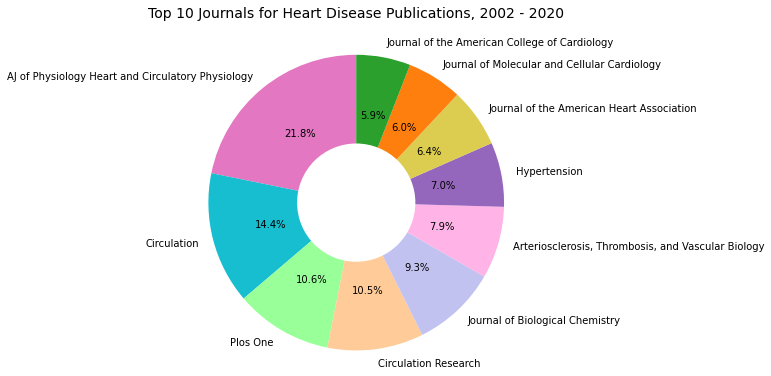

In [5]:
plt.figure(figsize=(13,6))

labels = Heart_disease_journals.iloc[:, 0]

sizes = Heart_disease_journals.iloc[:, -1]

colors = ["#e377c2", "#17becf", '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', "#9467bd", "#dccd50", "#ff7f0e", "#2ca02c"]

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90, frame=False,  autopct='%1.1f%%')

# Draw circle
center_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)

# Get the current figure
fig = plt.gcf()

# Get the current Axes and add center circle to the figure
fig.gca().add_artist(center_circle)
 
plt.axis('scaled')
plt.title('Top 10 Journals for Heart Disease Publications, 2002 - 2020\n', fontsize=14)

plt.show()

We can enhance the visualization of additional information from the sample dataset by building on the previous donut chart and creating a nested version. The [add_artist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.add_artist.html) method from Matplotlib’s figure module is used to incorporate any additional Artist (such as figures or objects) into the base figure. Similar to the earlier donut chart, this variation displays the distribution of publications across the top 10 journals for heart disease research. However, it also includes an additional layer that shows the gender distribution of first authors for each journal. This visualization highlights that a larger percentage of the first authors are male.

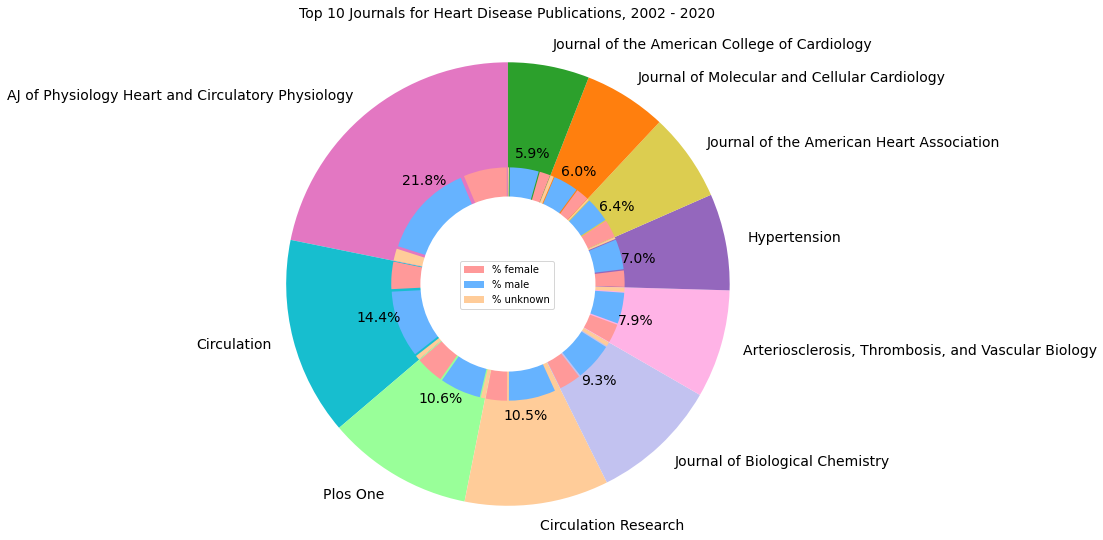

In [6]:
# Data to plot
plt.figure(figsize=(10,9))

labels = Heart_disease_journals.iloc[:, 0]
sizes = Heart_disease_journals.iloc[:, -1]

sizes_gender_array = Heart_disease_journals.iloc[:, 1:4].to_numpy().flatten()

sizes_gender = sizes_gender_array

colors = ["#e377c2", "#17becf", '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', "#9467bd", "#dccd50", "#ff7f0e", "#2ca02c"]

colors_gender_lst = ['#ff9999', '#66b3ff', '#ffcc99']
colors_gender =colors_gender_lst*10

explode_gender_lst = [0.1]
explode_gender = explode_gender_lst*30

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,  radius=3.8,  autopct='%1.1f%%', textprops={'fontsize': 14}) #explode=explode,
patches, texts =plt.pie(sizes_gender,colors=colors_gender,startangle=90, explode=explode_gender, radius=1.9)

# Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)

# Get the current figure
fig = plt.gcf()

# Get the current Axes and add center circle to the figure
fig.gca().add_artist(centre_circle)

plt.legend(patches, ['% female', '% male', '% unknown'], loc="center") 
plt.axis('scaled')
plt.title('Top 10 Journals for Heart Disease Publications, 2002 - 2020\n', fontsize=14)

plt.show()



Jupyter Notebook and dataset used for this article can be found at [GitHub](https://github.com/drozenshteyn/Visualisation-of-Data-with-Pie-Charts-in-Matplotlib)

Thank you for reading,

Diana

Note: I used GitHub embeds to publish this article. 